# 21M.387 Fundamentals of Music Processing
## Problem Set 1: Music Representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)


## Exercise 1

Below is a video of Lang Lang, world famous concert pianist, playing Frederic Chopin's "Minute Waltz".

The sheet music is [here](data/chopin_waltz_op64_1.pdf).

Questions:
1. How long is Lang Lang's rendition of this piece (approximately, in seconds)?
- How many measures are there in the score?
- How many measures are actually played in this recording? [hint, there is a repeated section]

- What is the average tempo of this recording? Give your answer in BPM where a beat is an entire measure. 

- Based on this average tempo, how long (in milliseconds) does an eighth-note last?
- In the actual recording, Lang Lang's tempo fluctuates a lot. What is (approximately) his maximum tempo and his minimum tempo?


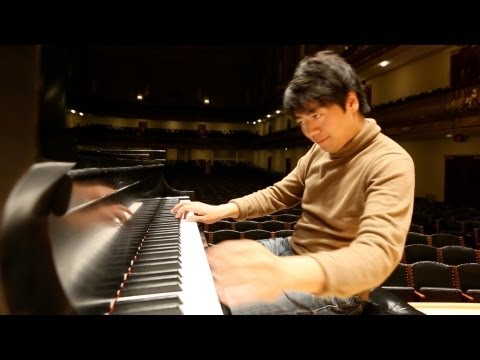

In [4]:
ipd.YouTubeVideo('hKILwVH_MdM')

Answers:
1. bpm=103 #seconds
2. 140
3. 140
4. 75
eigths_per_beat = 8
seconds_per_min = 60
ms_per_sec = 1000
5. 1/(bpm * (eighths_per_beat * seconds_per_min * ms_per_sec))
6. [44.5, 85]


## Exercise 2

Using the same score as in Exercise 1, write out what the Standard MIDI File (SMF) representation would look like for bar 5 of the Chopin Waltz.

- Assume a "ticks per quarter" value of 120.
- Remember that each midi event's tick value is a delta tick from the previous event.
- Assign channel 1 to the left hand and channel 2 to the right hand.
- Use note velocity = 60 for the beginning, but note that there is a slight crescendo at the end of the bar.
- Use a markdown table format to create your answer. It should look a bit like [_Fig 1.13b_](data/midi_table.png) of the text. You can use a [table generator](http://www.tablesgenerator.com/markdown_tables#) if you wish.


Answer:

<img src="data/midi_chopin.png" width = 600>

## Exercise 3

1. Write a python function that returns the frequency (in Hertz) of a given MIDI pitch, assuming equal tempered tuning. Test it out with `p = 69` (answer should be 440.0) and an octave lower.

- Write a python function that returns the midi-pitch from any frequency (also with equal tempered tuning). The midi-pitch value should be a floating-point value. Do not round it to the nearest integer.

In [22]:
import math

def pitch_to_freq(p):
    semitones_above_A4 = p-69
    freq_A4 = 440
    return freq_A4 * 2**((semitones_above_A4)/12.0)

assert pitch_to_freq(69) == 440.0

def freq_to_pitch(f):
    log_freq_ratio = math.log(f/440.0)
    semitones_above_A4 = 12.0*log_freq_ratio/math.log(2.0)
    return semitones_above_A4 + 69.0
    
#print freq_to_pitch(440.0)
assert(all( [(abs(x-freq_to_pitch(pitch_to_freq(x))) < 0.001) for x in range(1,100)] ))

## Exercise 4

Write a python function that takes as input a midi pitch (integer) and returns its _Scientific Pitch Notation_ name as a string. For example, `69` should return the string `"A4"`.

Next write a function that prints the SPN note names and frequencies of the C major scale, starting at C3 and ending at C4.

In [85]:
note_letters = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

def pitch_to_spn(s) :
    octave,note_index = divmod(s,12)
    return note_letters[note_index]+str(octave-1)

assert(pitch_to_spn(69) == "A4")
assert(all([pitch_to_spn(x)[0]=="C" for x in range(0,100,12)]))

def print_c_major() :
    print [pitch_to_spn(n) for n in range(4*12,5*12+1)]

print_c_major()

['C3', 'C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3', 'B3', 'C4']


## Exercise 5

Write a python function that calculates the frequencies of the first N harmonics of a given midi note. For each harmonic, it should print:
- the frequency
- the nearest equal-tempered note for that frequency
- the delta between those two frequencies, as measured cents (there are 100 cents in one semitone).

In [39]:
def compose2(f,g): return lambda x: f(g(x))

def print_harmonic_intontations(pitch, num_h) :
    harmonics = [pitch*k for k in range(2,num_h+2)]
    raw_pitches = map(freq_to_pitch, harmonics)
    nearest_pitches = map(reduce(compose2,[int,round,freq_to_pitch]), harmonics)
    nearest_note_names = map(pitch_to_spn, nearest_pitches)
    deltas = [100*(a-b) for (a,b) in zip(raw_pitches, nearest_pitches)]
    print zip(harmonics,nearest_note_names,deltas)

print_harmonic_intontations(48, 15)

[(96, 'G2', -35.676655364204635), (144, 'D3', -33.72165449881663), (192, 'G3', -35.676655364203924), (240, 'B3', -49.36294149936913), (288, 'D4', -33.72165449881663), (336, 'E4', 33.14925110492055), (384, 'G4', -35.676655364204635), (432, 'A4', -31.766653633428632), (480, 'B4', -49.36294149936913), (528, 'C5', 15.641287000552495), (576, 'D5', -33.72165449881663), (624, 'D#5', 4.851006405107228), (672, 'E5', 33.14925110492055), (720, 'F#5', -47.40794063398113), (768, 'G5', -35.676655364204635)]


## Exercise 6

How much space does it take to store a WAVE file (just the data part, ignoring the WAVE header) for the following cases:

1. A one minute CD quality song (stereo, 16 bits per channel, $F_s = 44100$)
- 20 seconds of low quality voice recording (mono, 8 bits per channel, $F_s = 8000$)

In [40]:
# answers (you can type the python code which prints the answers)
print "1. "+str(44100*60*16)+" bits"
print "2. "+str(8000*20*8)  +" bits"

1. 42336000 bits
2. 1280000 bits


## Exercise 7

Write code to synthesize a 3 second 44,100Hz tone using additive synthesis.

The inputs to your function should be:
- the fundamental frequency (in Hz)
- a list of partials. Each partial is a list of two numbers:
  - a partial number (ie, 1 for the fundamental, 2 for the 2nd harmonic, etc...)
  - an amplitude for that partial ($0 < a \le 1$)

Your code should create the appropriate sinusoid wave for each partial in the list, add them all together, and return the result.

Listen to the tones created for `partials0`, `partials1`, and `partials2` below.  
Describe briefly what each one sounds like. Why does `partials2` sound different from the first two? It's also fun to run the code for `partials2` a bunch of times to hear the different versions caused by the random variable.

In [74]:
def make_sine_tone(freq, amp, fs, dur):
    print freq, amp, fs, dur
    t = np.arange(fs*dur) / float(fs)
    return amp * np.sin(2 * np.pi * freq * t)
    
def play_simultaneously(freqs_and_amps, fs=44100, dur=3.0) :
    num_tones = len(freqs_and_amps)
    time = np.arange(int(fs*dur)) / float(fs)
    out = np.zeros(len(time))
    for h in range(num_tones):
        freq, amp = freqs_and_amps[h]
        out += make_sine_tone(freq,amp,fs,dur)
    return out

def make_tone(f0, partials):
    freqs_and_amps = [(f0*(part[0]),part[1]) for part in partials]
    return play_simultaneously(freqs_and_amps)
    
partials0 =  [(n,1./n) for n in range(1,20)]
partials1 =  [(n*2-1,1./n) for n in range(1,10)]
partials2 =  [(n + np.random.random(), 1./(n)) for n in range(1,20)]


In [80]:
# try this with different f0 and partial lists.
ipd.Audio(make_tone(220, partials1), rate=44100)

220 1.0 44100 3.0
660 0.5 44100 3.0
1100 0.333333333333 44100 3.0
1540 0.25 44100 3.0
1980 0.2 44100 3.0
2420 0.166666666667 44100 3.0
2860 0.142857142857 44100 3.0
3300 0.125 44100 3.0
3740 0.111111111111 44100 3.0


Description of what the tones sound like when trying different partials lists:
partial0: Like touching live speaker input to random object. 
partial1: Warmer, darker than first.
partial2: Sounds like two distinct notes that are not particularly consonant

